In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from classifiers.random_classifier import RandomClassifier
from classifiers.majority_classifier import MajorityClassifier
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from classifiers.logistic_regression_classifier import LogisticRegressionClassifier
from classifiers.decision_tree_classifier import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./seminar_2/train.csv')

In [3]:
train_df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3,3.932,3.2512,0,0.0,0,0,0,26.7,2,...,0,0,1,3.076,2.417,0,7.601,0,0,2
1,5,4.236,3.3944,0,0.0,0,0,0,29.4,2,...,0,0,0,3.351,2.405,0,8.003,0,0,2
2,6,4.236,3.4286,0,0.0,0,0,0,28.6,2,...,0,0,0,3.351,2.556,0,7.904,0,0,2
3,7,5.000,5.0476,1,0.0,0,0,0,11.1,0,...,0,0,1,4.712,4.583,0,9.303,0,0,2
4,8,4.525,3.8301,0,0.0,0,0,0,31.6,3,...,0,0,0,3.379,2.143,0,7.950,0,0,2


In [4]:
test_df = pd.read_csv('./seminar_2/test.csv')

In [5]:
test_df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,1,3.919,2.6909,0,0,0,0,0,31.4,2,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,2,4.170,2.1144,0,0,0,0,0,30.8,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,4,3.000,2.7098,0,0,0,0,0,20.0,0,...,0,0,1,3.046,5.000,0,6.690,0,0,2
3,13,4.214,2.6272,0,0,0,0,0,30.0,3,...,0,0,0,2.998,1.722,0,6.770,0,0,2
4,16,3.942,2.7719,1,0,0,0,0,31.6,2,...,0,0,0,3.542,1.739,0,8.127,0,1,2


## Exploration

In [6]:
class_counts = train_df["Class"].value_counts()

In [7]:
print("Class 1: ", class_counts[1], "percentage: ", class_counts[1]/len(train_df))
print("Class 2: ", class_counts[2], "percantage:", class_counts[2]/len(train_df))

Class 1:  564 percentage:  0.6666666666666666
Class 2:  282 percantage: 0.3333333333333333


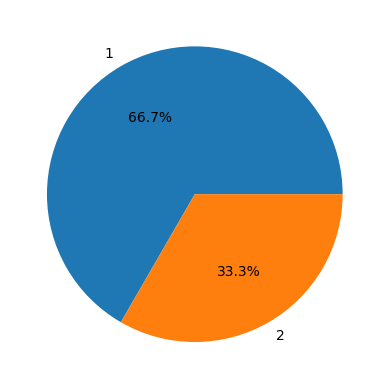

In [8]:
p = plt.pie(x=class_counts, labels=class_counts.index, autopct='%1.1f%%')

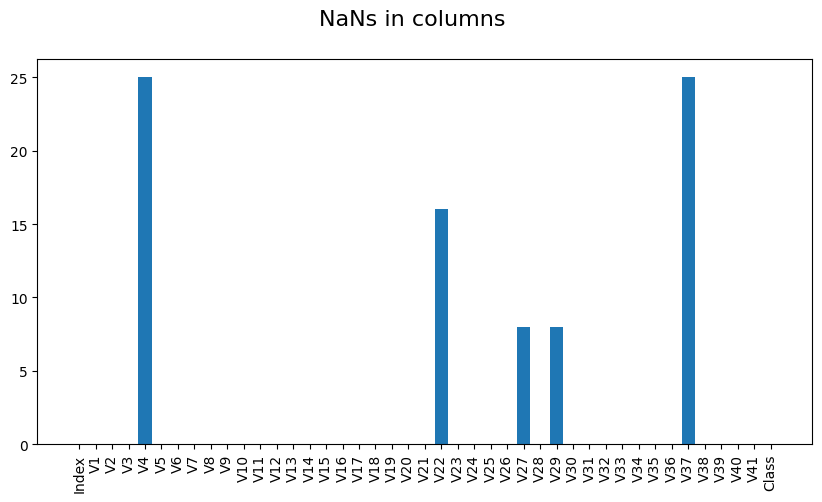

In [9]:
nans = train_df.isnull().sum(axis = 0)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('NaNs in columns', fontsize=16)
plt.bar(nans.index, nans.values)
plt.xticks(rotation=90)
plt.show()

In [10]:
correlation_in_data = train_df.corr()

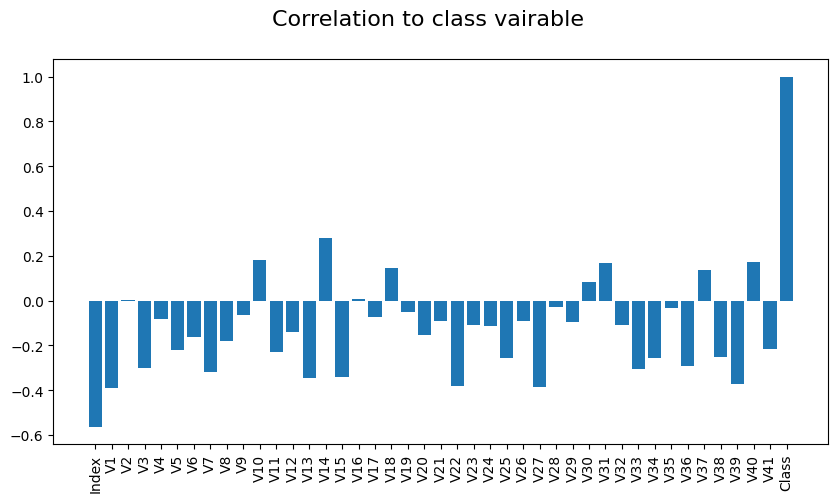

In [11]:
correlation_to_class = correlation_in_data["Class"]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Correlation to class vairable', fontsize=16)
plt.bar(correlation_to_class.index, correlation_to_class.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

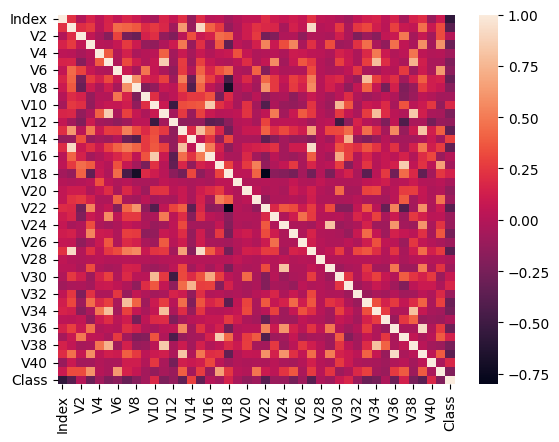

In [12]:
sns.heatmap(correlation_in_data, fmt=".2f")

In [13]:
correlated_columns = set()
threshold = 0.75

for i in range(len(correlation_in_data.columns)):
    for j in range(i):
        if abs(correlation_in_data.iloc[i, j]) > threshold:
            colname1 = correlation_in_data.columns[i]
            colname2 = correlation_in_data.columns[j]
            correlated_columns.add((colname1, colname2, correlation_in_data.iloc[i, j]))

print(correlated_columns)
print(len(correlated_columns), "highly correlated features")

{('V27', 'V1', 0.921560062534691), ('V29', 'V24', 0.8046206066746212), ('V11', 'V5', 0.8590175645510726), ('V30', 'V10', 0.7577897873010442), ('V33', 'V7', 0.7858011767376897), ('V34', 'V11', 0.7852915815925773), ('V15', 'V1', 0.90971096205887), ('V16', 'V10', 0.8439634438135399), ('V34', 'V5', 0.7827712292006271), ('V38', 'V11', 0.8368979414216005), ('V37', 'V17', 0.8498222432021918), ('V39', 'V36', 0.9165966103510599), ('V39', 'V13', 0.8135703600627614), ('V22', 'V18', -0.8008371258856498), ('V27', 'V15', 0.9230962155600061), ('V15', 'V13', 0.791588421036705), ('V38', 'V34', 0.7988417285560266)}
17 highly correlated features


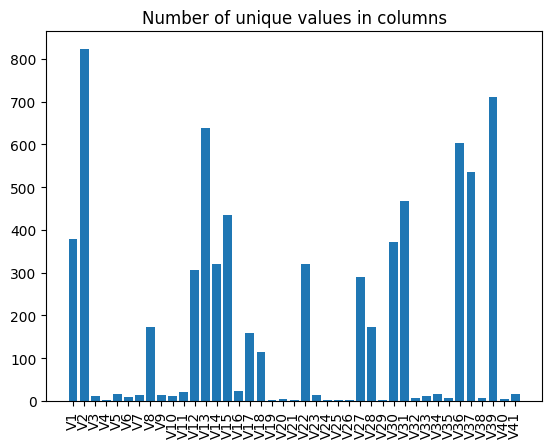

In [14]:
train_df_without_index_and_class = train_df.drop(["Index", "Class"], axis=1)
plt.bar(train_df_without_index_and_class.nunique().index, train_df_without_index_and_class.nunique().values)
plt.xticks(rotation=90)
plt.title("Number of unique values in columns")
plt.show()

Text(0.5, 1.0, 'Outliers of all columns')

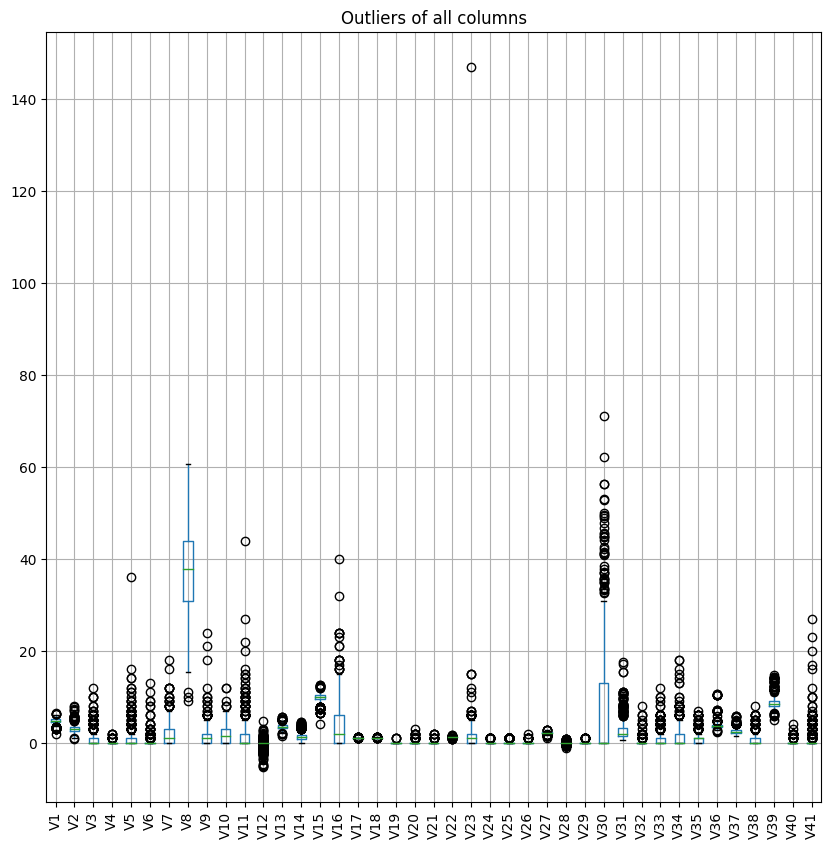

In [15]:
train_df_without_index_and_class.boxplot(figsize=(10, 10))
plt.xticks(rotation=90)
plt.title("Outliers of all columns")

In [16]:
continuous_columns =  [i for i in train_df_without_index_and_class.nunique().index.where(train_df_without_index_and_class.nunique().values >= 100) if i is not None]
" ".join(continuous_columns)

'V1 V2 V8 V12 V13 V14 V15 V17 V18 V22 V27 V28 V30 V31 V36 V37 V39'

## Modeling

In [17]:
train_features = train_df.drop(["Class", "Index"], axis=1)
train_target = train_df["Class"]

test_features = test_df.drop(["Class", "Index"], axis=1)
test_target = test_df["Class"]

In [18]:
discrete = False
N_bins = 10
N_unique = 100
fillna_method = pd.DataFrame.mean
dropna = False
outliers_method = None
polinomial = None

In [19]:
rnd_classifier = RandomClassifier(train_features, train_target)
majority_classifier = MajorityClassifier(train_df, train_target)
nb_classifier = NaiveBayesClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial)
lr_classifier = LogisticRegressionClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial, solver='lbfgs', max_iter=1000)
dt_classifier = DecisionTreeClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial, random_state=42)

Preprocessing...
Preprocessing...
Preprocessing...
Filling NaNs...
Preprocessing...
Filling NaNs...
Preprocessing...
Filling NaNs...


In [20]:
classifiers = [rnd_classifier, majority_classifier, nb_classifier, lr_classifier, dt_classifier]

In [21]:
rnd_classifier.evaluate(test_features, test_target), majority_classifier.evaluate(test_features, test_target), nb_classifier.evaluate(test_features, test_target), lr_classifier.evaluate(test_features, test_target), dt_classifier.evaluate(test_features, test_target)

((0, 0, 0, 0.5105605605605605),
 (0, 0, 0, 0.5),
 (0.7387387387387386,
  0.9425287356321839,
  0.6074074074074074,
  0.7699199199199198),
 (0.8749999999999999,
  0.8686131386861314,
  0.8814814814814815,
  0.8191191191191192),
 (0.844106463878327, 0.8671875, 0.8222222222222222, 0.7962462462462462))

In [22]:
display_df = pd.DataFrame(columns=["Feature_Importance", "Correlation", "Feature_Name"])
display_df["Feature_Importance"] = dt_classifier.classifier.feature_importances_
display_df["Correlation"] = abs(train_df.corr()["Class"].drop(["Class", "Index"]).values)
display_df["Feature_Name"] = train_features.columns

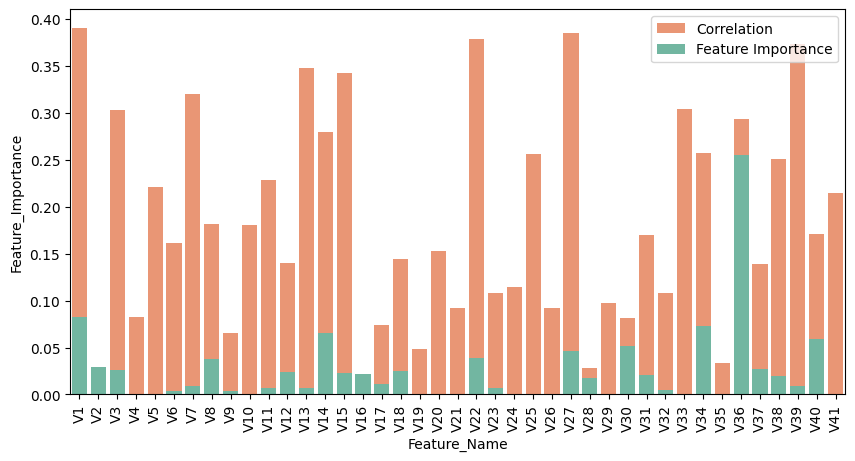

In [23]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x="Feature_Name", y="Correlation", data=display_df, color=sns.color_palette("Set2", 10)[1], label="Correlation")
sns.barplot(x="Feature_Name", y="Feature_Importance", data=display_df, color=sns.color_palette("Set2", 10)[0], label="Feature Importance")

plt.xticks(rotation=90)
plt.legend()

## Evaluation

In [24]:
all_data = pd.concat([train_df, test_df], axis=0)

In [25]:
def fold(data, k=5):
    data = data.sample(frac=1).reset_index(drop=True)
    folds = []
    for i in range(k):
        folds.append(data.iloc[i*len(data)//k:(i+1)*len(data)//k])
    return folds

In [26]:
folds = fold(all_data, k=5)

In [27]:
def train(folds):
    classifier_accuracies = [[] for i in range(len(classifiers))]
    for i in range(len(folds)):
        train_data = pd.concat([folds[j] for j in range(len(folds)) if j != i], axis=0)
        test_data = folds[i]
        train_features = train_data.drop(["Class", "Index"], axis=1)
        train_target = train_data["Class"]
        test_features = test_data.drop(["Class", "Index"], axis=1)
        test_target = test_data["Class"]

        for i, c in enumerate(classifiers):
            print(c.fillna_method)
            c.fit(train_features, train_target)
            classifier_accuracies[i].append(c.evaluate(test_features, test_target))
    return classifier_accuracies

In [28]:
train(folds)

None
None
Preprocessing...
None
None
Preprocessing...
<function NDFrame._add_numeric_operations.<locals>.mean at 0x00000197186329E0>
<function NDFrame._add_numeric_operations.<locals>.mean at 0x00000197186329E0>
Preprocessing...
Filling NaNs...
Fitting...


ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Report